<a href="https://colab.research.google.com/github/Saurabh-Bagchi/datasharing/blob/master/Human_Activity_Recognition_Project_Saurabh_Bagchi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective: 
    
In this notebook we will build a neural network model that can predict human activity based on the given sensor data.

# Dataset Info:
    
Dataset has 3,609 rows and 563 columns 

For each record in the dataset the following is provided:  

###Triaxial acceleration
from the accelerometer (total acceleration) and the estimated body acceleration.  

###Triaxial Angular velocity​
from the gyroscope.  
A 561-feature vector with time and frequency domain variables. Its activity label. An identifier of the subject who carried out the experiment. 

# Youtube video of participant/volunteer:

https://www.youtube.com/watch?v=lUI6VMj43PE

# Business context:
    
Smartphones have become an integral part of our lives. We carry them along with us everywhere. Most smartphones these days come inbuilt with several sophisticated sensors such as accelerometer, gyroscope, etc. We can use these sensors in order to track Human Activity. In this problem statement, we have a data collection of such activity recorded by a Samsung Galaxy S-II smartphone and we will be exploiting this data to cluster human activity.  
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually.   
The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain. 

# Domain

Mobile, Electronics

### 1. Load Libraries and dataset and do experimentation on dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Flatten
from sklearn.preprocessing import StandardScaler

### Fixing random seed so that the results are reproducible

In [3]:
# fix random seed for reproducibility
import numpy as np
import tensorflow as tf
import random as rn
import os
os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(37)
rn.seed(1254)
tf.random.set_seed(89)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/content/drive/MyDrive/human_activity.csv")

In [6]:
df.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X,tBodyAcc.min.Y,tBodyAcc.min.Z,tBodyAcc.sma,tBodyAcc.energy.X,tBodyAcc.energy.Y,tBodyAcc.energy.Z,tBodyAcc.iqr.X,tBodyAcc.iqr.Y,tBodyAcc.iqr.Z,tBodyAcc.entropy.X,tBodyAcc.entropy.Y,tBodyAcc.entropy.Z,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.2,tBodyAcc.arCoeff.X.3,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.2,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,tBodyAcc.arCoeff.Z.2,tBodyAcc.arCoeff.Z.3,tBodyAcc.arCoeff.Z.4,tBodyAcc.correlation.X.Y,...,fBodyBodyAccJerkMag.energy,fBodyBodyAccJerkMag.iqr,fBodyBodyAccJerkMag.entropy,fBodyBodyAccJerkMag.maxInds,fBodyBodyAccJerkMag.meanFreq,fBodyBodyAccJerkMag.skewness,fBodyBodyAccJerkMag.kurtosis,fBodyBodyGyroMag.mean,fBodyBodyGyroMag.std,fBodyBodyGyroMag.mad,fBodyBodyGyroMag.max,fBodyBodyGyroMag.min,fBodyBodyGyroMag.sma,fBodyBodyGyroMag.energy,fBodyBodyGyroMag.iqr,fBodyBodyGyroMag.entropy,fBodyBodyGyroMag.maxInds,fBodyBodyGyroMag.meanFreq,fBodyBodyGyroMag.skewness,fBodyBodyGyroMag.kurtosis,fBodyBodyGyroJerkMag.mean,fBodyBodyGyroJerkMag.std,fBodyBodyGyroJerkMag.mad,fBodyBodyGyroJerkMag.max,fBodyBodyGyroJerkMag.min,fBodyBodyGyroJerkMag.sma,fBodyBodyGyroJerkMag.energy,fBodyBodyGyroJerkMag.iqr,fBodyBodyGyroJerkMag.entropy,fBodyBodyGyroJerkMag.maxInds,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,-0.983,-0.941,-0.566,-0.817,0.851,0.674,0.834,-0.987,-1.0,-1.000,-1.000,-0.997,-0.972,-0.983,-0.637,-0.5150,-0.537,0.360,-0.233,0.2260,0.0695,0.0643,-0.0764,0.138,-0.0368,0.231,-0.1150,0.3190,-0.48800,-0.0959,...,-1.0,-0.991,-1.0,-0.905,0.290,-0.669,-0.933,-0.988,-0.985,-0.984,-0.985,-0.995,-0.988,-1.000,-0.989,-0.736,-1.000,-0.2570,-0.32200,-0.6580,-0.996,-0.995,-0.994,-0.994,-0.997,-0.996,-1.0,-0.994,-0.956,-1.000,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,-0.985,-0.940,-0.555,-0.816,0.845,0.685,0.838,-0.988,-1.0,-1.000,-1.000,-0.996,-0.980,-0.983,-0.629,-0.3970,-0.424,0.346,-0.174,0.1780,0.1690,-0.0202,0.1360,-0.114,0.2430,0.301,-0.0764,0.0820,0.15300,0.0085,...,-1.0,-0.984,-1.0,-1.000,0.502,-0.517,-0.786,-0.983,-0.981,-0.982,-0.979,-0.987,-0.983,-1.000,-0.981,-0.641,-1.000,-0.0472,0.00787,-0.2840,-0.991,-0.989,-0.991,-0.987,-0.980,-0.991,-1.0,-0.992,-0.923,-1.000,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,-0.992,-0.943,-0.569,-0.823,0.852,0.693,0.846,-0.997,-1.0,-1.000,-1.000,-0.998,-0.993,-0.990,-0.888,-0.5540,-0.551,0.412,-0.128,0.2650,0.0677,0.2890,-0.2410,0.315,-0.1520,0.181,0.0504,-0.0398,-0.00999,0.0436,...,-1.0,-0.994,-1.0,-0.905,0.530,-0.606,-0.869,-0.999,-0.998,-0.998,-0.999,-0.998,-0.999,-1.000,-0.996,-1.000,-0.949,0.3250,-0.75900,-0.9420,-0.999,-0.999,-0.999,-0.999,-0.995,-0.999,-1.0,-0.999,-1.000,-0.968,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,-0.888,-0.926,-0.448,-0.731,0.849,0.681,0.838,-0.904,-1.0,-0.989,-0.991,-0.989,-0.770,-0.869,-0.163,0.0546,0.073,0.158,-0.160,0.1900,-0.3220,-0.3150,0.2790,-0.307,0.3430,-0.083,0.0273,-0.0465,-0.08650,0.8220,...,-1.0,-0.984,-1.0,-1.000,0.169,-0.522,-0.818,-0.911,-0.884,-0.898,-0.880,-0.847,-0.911,-0.993,-0.956,-0.387,-1.000,-0.1730,0.07620,-0.3040,-0.990,-0.989,-0.990,-0.987,-0.999,-0.990,-1.0,-0.992,-0.923,-1.000,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0

### Dataframe has 3,609 rows and 563 columns
### Size is 2,031,867 (3,609 * 563)

In [7]:
df.shape

(3609, 563)

In [8]:
df.size

2031867

### Activity is a categorical column with total six activities namely



*   Standing
*   Sitting


*   Laying
*   Walking


*   Walking downstairs
*   Walking upstairs







In [9]:
df.activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

### From the barplot below the data appears to be fairly balanced

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


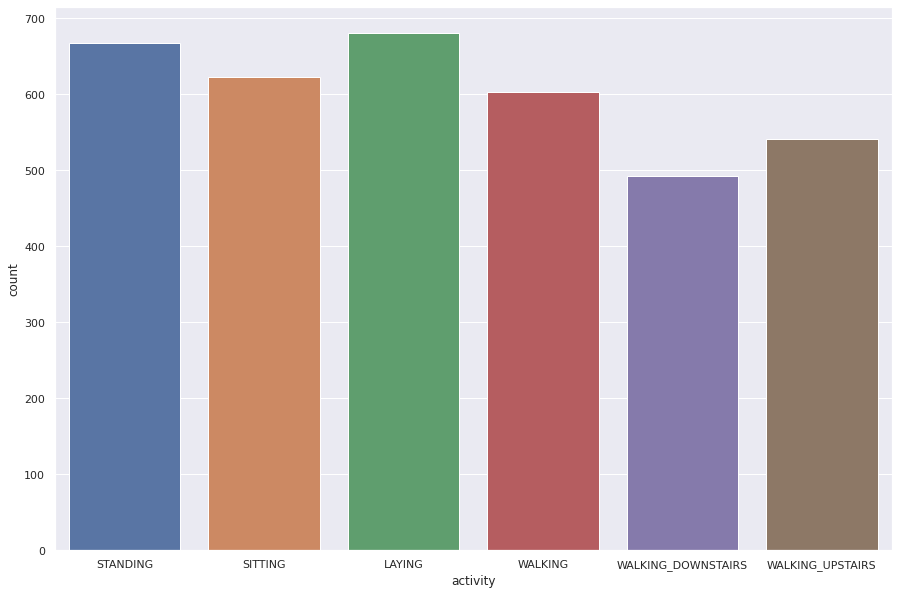

In [10]:
sns.set(rc={'figure.figsize':(15,10)});
sns.countplot(df.activity);

### Checking for any missing values in the dataframe - There are none

In [11]:
df.isna().sum()

rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64

In [12]:
df.isnull().sum()

rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64

### Segregate the data into dependent and independent features, we drop RN which is identifier of the subject that carried out the experiment as that will not provide much value

In [13]:
#df = df2

In [14]:
df2 = df
y = df['activity']
x = df.drop(['activity','rn'],axis=1)

In [15]:
print(x.shape)
print(y.shape)

(3609, 561)
(3609,)


In [16]:
#Drop rn column as it does not have any specific meaning
#Raised this question on Olympus portal as well
#x.pop('rn')
#x2 = x

In [17]:
output = pd.get_dummies(y)

In [18]:
output

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
3604,0,0,0,0,0,1
3605,0,0,0,0,0,1
3606,0,0,0,0,0,1
3607,0,0,0,0,0,1


In [19]:
#import pandas as pd
#import seaborn as sn
#import matplotlib.pyplot as plt
#corrMatrix = x.corr()
#sns.heatmap(corrMatrix, annot=True)
#plt.show()

### Split the data into 70% training and 30% test

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size=0.3)

In [21]:
train.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X,tBodyAcc.min.Y,tBodyAcc.min.Z,tBodyAcc.sma,tBodyAcc.energy.X,tBodyAcc.energy.Y,tBodyAcc.energy.Z,tBodyAcc.iqr.X,tBodyAcc.iqr.Y,tBodyAcc.iqr.Z,tBodyAcc.entropy.X,tBodyAcc.entropy.Y,tBodyAcc.entropy.Z,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.2,tBodyAcc.arCoeff.X.3,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.2,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,tBodyAcc.arCoeff.Z.2,tBodyAcc.arCoeff.Z.3,tBodyAcc.arCoeff.Z.4,tBodyAcc.correlation.X.Y,...,fBodyBodyAccJerkMag.energy,fBodyBodyAccJerkMag.iqr,fBodyBodyAccJerkMag.entropy,fBodyBodyAccJerkMag.maxInds,fBodyBodyAccJerkMag.meanFreq,fBodyBodyAccJerkMag.skewness,fBodyBodyAccJerkMag.kurtosis,fBodyBodyGyroMag.mean,fBodyBodyGyroMag.std,fBodyBodyGyroMag.mad,fBodyBodyGyroMag.max,fBodyBodyGyroMag.min,fBodyBodyGyroMag.sma,fBodyBodyGyroMag.energy,fBodyBodyGyroMag.iqr,fBodyBodyGyroMag.entropy,fBodyBodyGyroMag.maxInds,fBodyBodyGyroMag.meanFreq,fBodyBodyGyroMag.skewness,fBodyBodyGyroMag.kurtosis,fBodyBodyGyroJerkMag.mean,fBodyBodyGyroJerkMag.std,fBodyBodyGyroJerkMag.mad,fBodyBodyGyroJerkMag.max,fBodyBodyGyroJerkMag.min,fBodyBodyGyroJerkMag.sma,fBodyBodyGyroJerkMag.energy,fBodyBodyGyroJerkMag.iqr,fBodyBodyGyroJerkMag.entropy,fBodyBodyGyroJerkMag.maxInds,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
570,1622,WALKING_UPSTAIRS,0.393,0.01080,-0.1470,-0.260,-0.371,-0.185,-0.277,-0.368,-0.220,-0.195,-0.226,-0.383,0.369,0.339,0.287,-0.208,-0.722,-0.921,-0.698,-0.269,-0.502,-0.328,0.297,0.3180,0.158,-0.619000,0.5110,-0.36400,0.3760,-0.391,0.3830,-0.1400,0.0989,-0.3800,0.1450,0.1830,-0.13500,-0.228,...,-0.874,-0.483,0.138,-0.905,0.1360,-0.203,-0.612,-0.602,-0.569,-0.534,-0.596,-0.844,-0.602,-0.890,-0.635,0.371,-0.846,-0.07350,-0.259,-0.600,-0.700,-0.773,-0.726,-0.842,-0.628,-0.700,-0.960,-0.745,0.191,-0.968,0.0910,-0.570,-0.892,-0.4890,0.0018,0.894,0.4660,-0.549,0.3000,0.259
2856,8155,SITTING,0.278,-0.01070,-0.1120,-0.995,-0.979,-0.971,-0.996,-0.977,-0.971,-0.939,-0.554,-0.814,0.842,0.691,0.827,-0.985,-1.000,-1.000,-0.999,-0.997,-0.977,-0.974,-0.639,-0.3480,-0.491,0.368000,-0.1640,-0.00628,0.5210,0.178,-0.2110,0.3100,-0.1710,0.1980,-0.2520,0.4620,-0.29300,-0.292,...,-1.000,-0.989,-1.000,-0.873,0.4380,-0.355,-0.675,-0.984,-0.969,-0.976,-0.961,-0.998,-0.984,-0.999,-0.987,-0.679,-1.000,-0.41900,0.519,0.337,-0.992,-0.993,-0.993,-0.993,-0.989,-0.992,-1.000,-0.992,-0.923,-0.873,0.1670,-0.386,-0.714,-0.0562,-0.1350,-0.321,-0.4910,-0.864,0.0905,0.117
3515,10000,LAYING,0.270,-0.01820,-0.1050,-0.967,-0.987,-0.974,-0.965,-0.987,-0.972,-0.919,-0.572,-0.809,0.826,0.690,0.837,-0.971,-0.999,-1.000,-0.999,-0.965,-0.987,-0.971,-0.203,-0.6400,-0.389,-0.222000,0.0816,-0.07270,0.0841,0.197,-0.0737,0.1580,0.0116,0.1150,0.0418,-0.0763,-0.19900,0.446,...,-1.000,-0.988,-1.000,-0.841,0.5130,-0.756,-0.965,-0.978,-0.982,-0.978,-0.984,-0.986,-0.978,-1.000,-0.973,-0.581,-1.000,0.06320,-0.544,-0.800,-0.986,-0.987,-0.985,-0.990,-0.996,-0.986,-1.000,-0.985,-0.829,-1.000,0.0541,-0.445,-0.790,-0.0389,-0.0196,-0.506,-0.6010,0.530,-0.4920,-0.512
843,2401,STANDING,0.316,-0.00901,-0.0637,-0.951,-0.867,-0.891,-0.953,-0.875,-0.888,-0.880,-0.447,-0.715,0.824,0.634,0.808,-0.901,-0.998,-0.996,-0.990,-0.954,-0.901,-0.880,0.218,-0.0776,0.150,-0.392000,0.2670,-0.11700,0.2060,-0.450,0.3070,0.0151,0.0449,-0.0989,-0.0309,0.2870,-0.27000,0.334,...,-0.998,-0.941,-0.799,-1.000,0.0118,-0.278,-0.609,-0.916,-0.902,-0.891,-0.920,-0.989,-0.916,-0.994,-0.909,-0.168,-1.000,-0.32700,-0.384,-0.731,-0.950,-0.952,-0.940,-0.963,-0.985,-0.950,-0.999,-0.923,-0.434,-1.000,-0.2500,-0.506,-0.845,0.0132,0

### Do one hot encoding of the target variable and drop rn and activity column from the independent feature set of test and train

In [22]:
y_train = pd.get_dummies(train['activity'])
y_test = pd.get_dummies(test['activity'])
x_train = train.drop(['rn','activity'],axis=1)
x_test = test.drop(['rn','activity'],axis=1)

In [23]:
#from keras.datasets import mnist

#(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [24]:
x_train.shape

(2526, 561)

### Understand the distribution of the readings across Accelerometer, Gyroscope and Others. Most of the readings are coming from Accelerometer (cannot understand rotation) and Gyroscope (can understand rotation) whereas very few are from others. Due to the skewness in terms of types of features coming from both instruments, the model will be able to distinguish better between motion activities (walking, walking_downstairs and walking_upstairs) compared to non_motion activities (standing, sitting and laying).
### More details were found on difference between the two devices based on link below 
https://www.livescience.com/40103-accelerometer-vs-gyroscope.html#:~:text=Uses%20of%20a%20gyroscope%20or,rotation%2C%20whereas%20the%20other%20cannot.&text=Using%20the%20key%20principles%20of,linear%20acceleration%20based%20on%20vibration.

<BarContainer object of 3 artists>

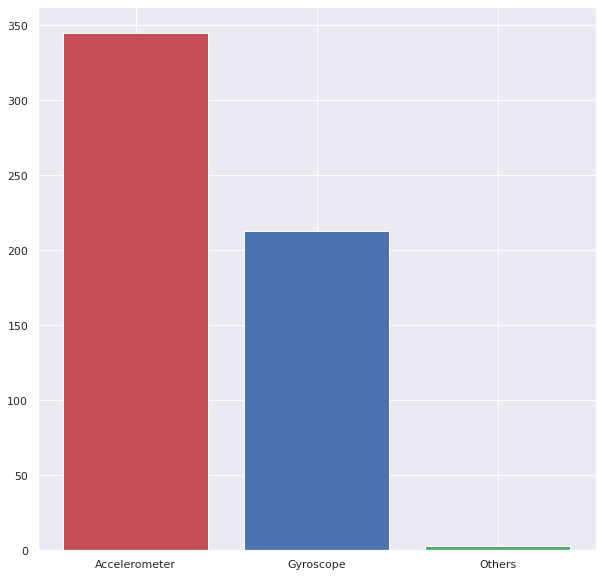

In [25]:
# Count for each type
acc = 0
gyro = 0
others = 0
for column in x_train.columns:
    if 'Acc' in str(column):
        acc += 1
    elif 'Gyro' in str(column):
        gyro += 1
    else:
        others += 1

# Show bar plot for the three types
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 16})
plt.bar(['Accelerometer', 'Gyroscope', 'Others'], [acc, gyro, others], color = ('r', 'b', 'g'))

### Pie chart representation of the six activities in train dataset. The activities seem fairly well distributed, so there is no imbalance and we do not need to do upsampling or downsampling

([<matplotlib.patches.Wedge at 0x7f5f425c3eb8>,
 [Text(0.908201558199434, 0.6206206004348551, 'LAYING'),
  Text(-0.22549027738748767, 1.0766402067560519, 'SITTING'),
  Text(-1.0728539267420363, 0.24286714861049774, 'STANDING'),
  Text(-0.7325803093381352, -0.8205644949484729, 'WALKING'),
  Text(0.2654946574212041, -1.0674795486943989, 'WALKING_DOWNSTAIRS'),
  Text(1.000853397799093, -0.45639070555173544, 'WALKING_UPSTAIRS')],
 [Text(0.4953826681087822, 0.33852032750992095, '19.08'),
  Text(-0.12299469675681145, 0.58725829459421, '18.41'),
  Text(-0.5851930509502016, 0.13247299015118058, '17.93'),
  Text(-0.3995892596389828, -0.4475806336082579, '15.95'),
  Text(0.14481526768429312, -0.5822615720151266, '15.00'),
  Text(0.5459200351631416, -0.24894038484640113, '13.62')])

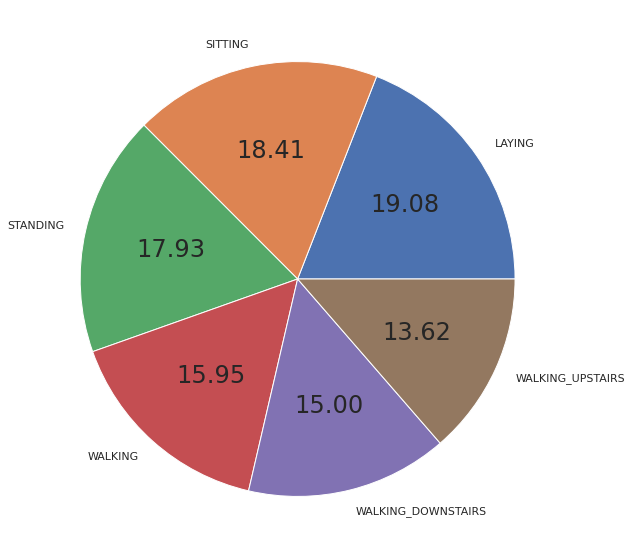

In [26]:
# Count the number of records for each activity
count_of_each_activity = np.array(train['activity'].value_counts())

# Identify all the unqiue activities and in sorted order
activities = sorted(train['activity'].unique())

# Plot a pie chart for different activities
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

### Pie chart representation of the six activities in test dataset. The activities seem fairly well distributed, so there is no imbalance and we do not need to do upsampling or downsampling

([<matplotlib.patches.Wedge at 0x7f5f42524860>,
 [Text(0.9147273608912745, 0.6109614187793566, 'LAYING'),
  Text(-0.20461472585580998, 1.08080193095819, 'SITTING'),
  Text(-1.0719623753136116, 0.2467724982894159, 'STANDING'),
  Text(-0.7308118653240512, -0.822139901416773, 'WALKING'),
  Text(0.25764305386476954, -1.0694017284422332, 'WALKING_DOWNSTAIRS'),
  Text(0.9988405630946215, -0.4607792633320421, 'WALKING_UPSTAIRS')],
 [Text(0.498942196849786, 0.3332516829705581, '18.74'),
  Text(-0.11160803228498725, 0.5895283259771944, '18.47'),
  Text(-0.5847067501710609, 0.13460318088513593, '18.37'),
  Text(-0.3986246538131188, -0.44843994622733063, '15.70'),
  Text(0.14053257483532883, -0.5833100336957635, '14.96'),
  Text(0.5448221253243389, -0.2513341436356593, '13.76')])

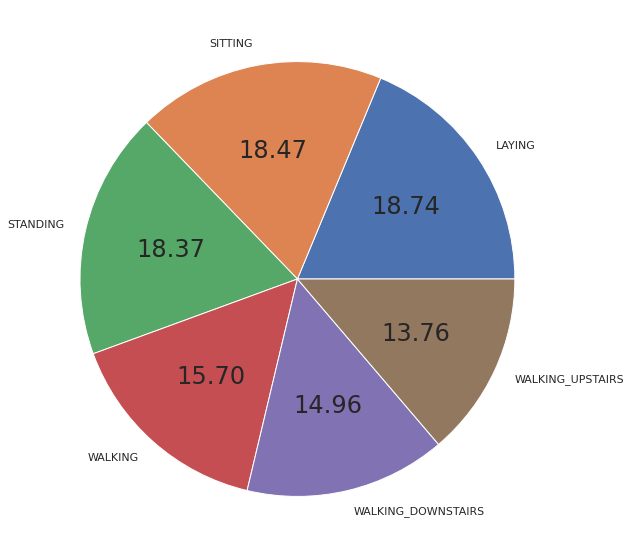

In [27]:
# Count the number of records for each activity
count_of_each_activity = np.array(test['activity'].value_counts())

# Identify all the unqiue activities and in sorted order
activities = sorted(test['activity'].unique())

# Plot a pie chart for different activities
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

### Check the size of train and test datasets

In [28]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2526, 561) (1083, 561) (2526, 6) (1083, 6)


### 3. Basic NN model

#### Naive MLP (Multi Layer Perceptron) model without any alterations

In [29]:
model = Sequential()

In [30]:
model.add(Dense(50, input_shape = (x_train.shape[1], )))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))

In [31]:
adam = optimizers.Adam(lr = 0.01)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Scale the independent feature set in both test and train dataframes before running the MLP model. We have used Standard scalar here

In [32]:
# define standard scaler
scaler = StandardScaler()

In [33]:
# transform data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

### Fit the MLP model with batch size of 200 and epochs as 100

In [34]:
history = model.fit(x_train_scaled, y_train, batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
13/13 [==============================] - 0s 3ms/step - loss: 1.0352 - accuracy: 0.5443
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3200 - accuracy: 0.8702
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1749 - accuracy: 0.9283
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.9505
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0890 - accuracy: 0.9663
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0915 - accuracy: 0.9640
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1040 - accuracy: 0.9584
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0677 - accuracy: 0.9751
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9842
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9854
Epoch 11/

In [35]:
results = model.evaluate(x_test_scaled, y_test)

34/34 [==============================] - 0s 956us/step - loss: 0.1486 - accuracy: 0.9778


In [36]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9778393507003784


### We have achieved 100% accuracy in the train dataframe and 97.78% accuracy in test dataframe which is good. Let us print the actual and predicted values, as well as confusion matrix to visualize the classification

In [37]:
# make a prediction
ynew = model.predict_classes(x_test_scaled)
# show the inputs and predicted outputs
for i in range(len(x_test_scaled)):
  arr = df.activity.unique()
  pred =  ynew[i]
  print("Actual Y=%s, Predicted=%s" % (test.iloc[i, test.columns.get_loc('activity')], arr[pred]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Actual Y=SITTING, Predicted=SITTING
Actual Y=WALKING, Predicted=WALKING
Actual Y=STANDING, Predicted=LAYING
Actual Y=WALKING, Predicted=WALKING
Actual Y=WALKING_UPSTAIRS, Predicted=WALKING_UPSTAIRS
Actual Y=WALKING_UPSTAIRS, Predicted=WALKING_UPSTAIRS
Actual Y=SITTING, Predicted=SITTING
Actual Y=LAYING, Predicted=STANDING
Actual Y=STANDING, Predicted=SITTING
Actual Y=SITTING, Predicted=SITTING
Actual Y=WALKING, Predicted=WALKING
Actual Y=LAYING, Predicted=STANDING
Actual Y=LAYING, Predicted=STANDING
Actual Y=STANDING, Predicted=SITTING
Actual Y=STANDING, Predicted=LAYING
Actual Y=STANDING, Predicted=SITTING
Actual Y=WALKING, Predicted=WALKING
Actual Y=LAYING

### Useful function to plot confusion matrix of a multiclass problem. Here we have six types of activities, so we have six classes

In [38]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [39]:
#print(arr)

In [40]:
#print(ynew)

### Print the confusion matrix for the MLP model on test dataframe

In [41]:
from sklearn.metrics import confusion_matrix
ynew = model.predict_classes(x_test_scaled)
i, j = np.where(pd.get_dummies(test['activity']).values == 1)
#print(j)
mul_c = confusion_matrix(
    #test['activity'],
    j,
    ynew)
    #labels=['STANDING','SITTING','LAYING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'])
    #labels=[0,1,2,3,4,5])
mul_c

array([[199,   0,   0,   0,   0,   0],
       [  0, 163,   7,   0,   0,   0],
       [  0,  12, 191,   0,   0,   0],
       [  0,   0,   0, 198,   1,   1],
       [  0,   0,   0,   0, 148,   1],
       [  0,   0,   0,   1,   1, 160]])

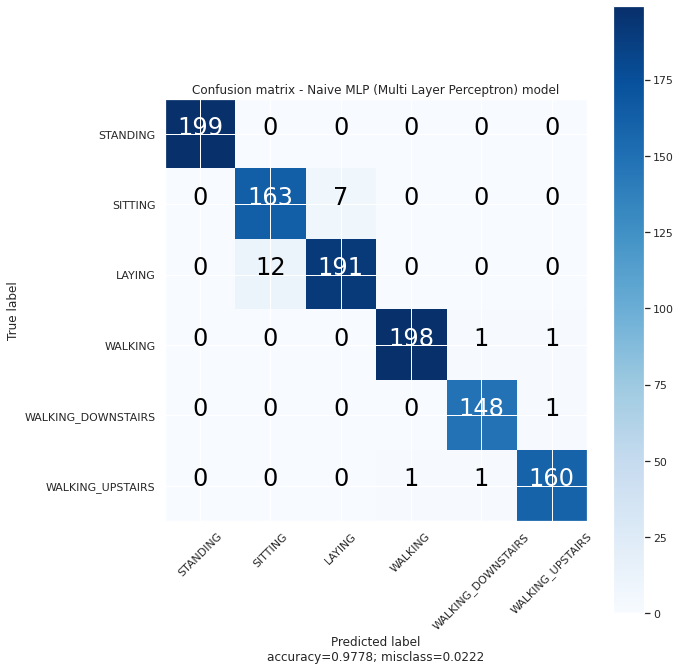

In [42]:
plot_confusion_matrix(mul_c,
                          ['STANDING','SITTING','LAYING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'],
                          'Confusion matrix - Naive MLP (Multi Layer Perceptron) model',
                           'Blues',
                          False)

### From the confusion matrix above the model does a good job of predicting the motion activities (walking, walking downstairs, walking upstairs) but not the non-motion activities (standing, sitting, laying). Out of 6 classes, we have 5 classes with some degree of misprediction

## Now, we will train Neural network using below techniques



1.   Weight Initialization
2.   Batch normalization

1.   Dropout





### 1. Weight Initialization

Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree. Here we use the Kaiming He weight initialization with Adam optimizer.

Reference: https://keras.io/initializers/

In [43]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (x_train.shape[1], ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(y_train.shape[1], kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

### Fit the MLP model on the train dataframe, keeping # batch size and # epochs constant

In [44]:
model = mlp_model()
history = model.fit(x_train_scaled, y_train, batch_size=200, epochs = 100, verbose = 1)

Epoch 1/100
13/13 [==============================] - 0s 3ms/step - loss: 1.6758 - accuracy: 0.4173
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.7276
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8373
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2399 - accuracy: 0.9097
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1700 - accuracy: 0.9335
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1243 - accuracy: 0.9525
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0956 - accuracy: 0.9707
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0789 - accuracy: 0.9755
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0606 - accuracy: 0.9790
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9850
Epoch 11/

In [45]:
results = model.evaluate(x_test_scaled, y_test)

34/34 [==============================] - 0s 974us/step - loss: 0.1004 - accuracy: 0.9714


In [46]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9713758230209351


### We are able to achieve a slightly lower accuracy of 97.14% compared to 97.78% of the naive MLP model

In [47]:
# make a prediction
ynew = model.predict_classes(x_test_scaled)
# show the inputs and predicted outputs
for i in range(len(x_test_scaled)):
  arr = df.activity.unique()
  pred =  ynew[i]
  print("Actual Y=%s, Predicted=%s" % (test.iloc[i, test.columns.get_loc('activity')], arr[pred]))

Actual Y=SITTING, Predicted=SITTING
Actual Y=WALKING, Predicted=WALKING
Actual Y=STANDING, Predicted=LAYING
Actual Y=WALKING, Predicted=WALKING
Actual Y=WALKING_UPSTAIRS, Predicted=WALKING_UPSTAIRS
Actual Y=WALKING_UPSTAIRS, Predicted=WALKING_UPSTAIRS
Actual Y=SITTING, Predicted=SITTING
Actual Y=LAYING, Predicted=STANDING
Actual Y=STANDING, Predicted=SITTING
Actual Y=SITTING, Predicted=SITTING
Actual Y=WALKING, Predicted=WALKING
Actual Y=LAYING, Predicted=STANDING
Actual Y=LAYING, Predicted=STANDING
Actual Y=STANDING, Predicted=SITTING
Actual Y=STANDING, Predicted=LAYING
Actual Y=STANDING, Predicted=LAYING
Actual Y=WALKING, Predicted=WALKING
Actual Y=LAYING, Predicted=STANDING
Actual Y=LAYING, Predicted=STANDING
Actual Y=STANDING, Predicted=LAYING
Actual Y=WALKING_UPSTAIRS, Predicted=WALKING_UPSTAIRS
Actual Y=WALKING_UPSTAIRS, Predicted=WALKING_UPSTAIRS
Actual Y=WALKING, Predicted=WALKING
Actual Y=WALKING, Predicted=WALKING
Actual Y=WALKING_DOWNSTAIRS, Predicted=WALKING_DOWNSTAIRS
Actu

In [48]:
from sklearn.metrics import confusion_matrix
ynew = model.predict_classes(x_test_scaled)
i, j = np.where(pd.get_dummies(test['activity']).values == 1)
#print(j)
mul_c = confusion_matrix(
    #test['activity'],
    j,
    ynew)
    #labels=['STANDING','SITTING','LAYING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'])
    #labels=[0,1,2,3,4,5])
mul_c

array([[196,   3,   0,   0,   0,   0],
       [  0, 164,   6,   0,   0,   0],
       [  0,  14, 189,   0,   0,   0],
       [  0,   0,   0, 199,   1,   0],
       [  0,   0,   0,   1, 146,   2],
       [  0,   0,   0,   1,   3, 158]])

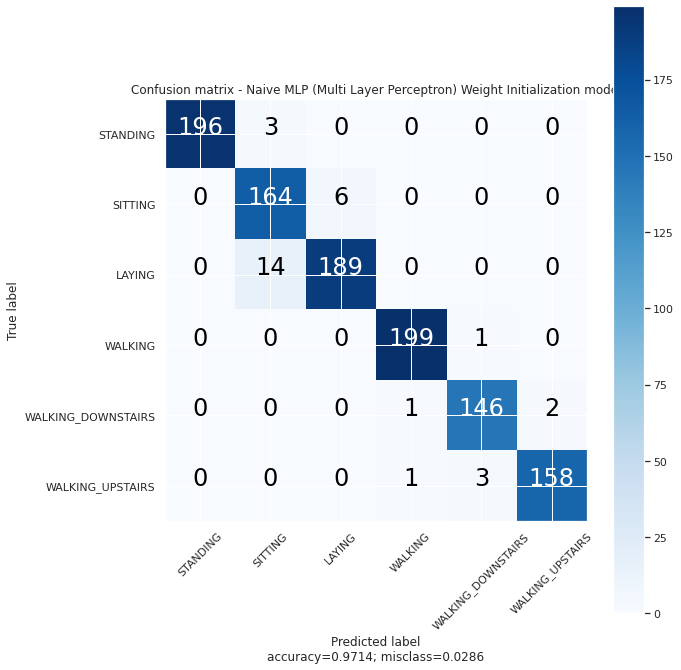

In [49]:
plot_confusion_matrix(mul_c,
                          ['STANDING','SITTING','LAYING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'],
                          'Confusion matrix - Naive MLP (Multi Layer Perceptron) Weight Initialization model',
                           'Blues',
                          False)

### We continue to see that the model is able to fairly accurately classify the motion activities (walking, walking downstairs, walking upstairs) compared to the non motion activities (standing, sitting, laying). However we have 6 out of 6 classes with some degree of misprediction.

### 2. Batch Normalization

Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

Normalize each mini-batch before nonlinearity

Reference: https://keras.io/optimizers/

In [50]:
from keras.layers import BatchNormalization, Dropout

### Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

In [51]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (x_train.shape[1], )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(y_train.shape[1]))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

### Fit the batch normalized MLP model on the train dataframe, keeping # epochs constant

In [52]:
model = mlp_model()
history = model.fit(x_train_scaled, y_train, epochs = 100, verbose = 1)

Epoch 1/100
79/79 [==============================] - 0s 2ms/step - loss: 0.8358 - accuracy: 0.7043
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.9006
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2131 - accuracy: 0.9283
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9470
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1384 - accuracy: 0.9565
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.9592
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1139 - accuracy: 0.9584
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9624
Epoch 9/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0951 - accuracy: 0.9640
Epoch 10/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0811 - accuracy: 0.9751
Epoch 11/

In [53]:
results = model.evaluate(x_test_scaled, y_test)

34/34 [==============================] - 0s 1ms/step - loss: 0.1350 - accuracy: 0.9658


In [54]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9658356308937073


### Accuracy on test dataset drops slightly to 96.58% compared to 97.14% previously

In [55]:
# make a prediction
ynew = model.predict_classes(x_test_scaled)
# show the inputs and predicted outputs
for i in range(len(x_test_scaled)):
  arr = df.activity.unique()
  pred =  ynew[i]
  print("Actual Y=%s, Predicted=%s" % (test.iloc[i, test.columns.get_loc('activity')], arr[pred]))

Actual Y=SITTING, Predicted=SITTING
Actual Y=WALKING, Predicted=WALKING
Actual Y=STANDING, Predicted=LAYING
Actual Y=WALKING, Predicted=WALKING
Actual Y=WALKING_UPSTAIRS, Predicted=WALKING_UPSTAIRS
Actual Y=WALKING_UPSTAIRS, Predicted=WALKING_UPSTAIRS
Actual Y=SITTING, Predicted=SITTING
Actual Y=LAYING, Predicted=STANDING
Actual Y=STANDING, Predicted=LAYING
Actual Y=SITTING, Predicted=SITTING
Actual Y=WALKING, Predicted=WALKING
Actual Y=LAYING, Predicted=STANDING
Actual Y=LAYING, Predicted=STANDING
Actual Y=STANDING, Predicted=LAYING
Actual Y=STANDING, Predicted=LAYING
Actual Y=STANDING, Predicted=LAYING
Actual Y=WALKING, Predicted=WALKING
Actual Y=LAYING, Predicted=STANDING
Actual Y=LAYING, Predicted=STANDING
Actual Y=STANDING, Predicted=LAYING
Actual Y=WALKING_UPSTAIRS, Predicted=WALKING_UPSTAIRS
Actual Y=WALKING_UPSTAIRS, Predicted=WALKING_UPSTAIRS
Actual Y=WALKING, Predicted=WALKING_DOWNSTAIRS
Actual Y=WALKING, Predicted=WALKING
Actual Y=WALKING_DOWNSTAIRS, Predicted=WALKING_DOWNST

In [56]:
from sklearn.metrics import confusion_matrix
ynew = model.predict_classes(x_test_scaled)
i, j = np.where(pd.get_dummies(test['activity']).values == 1)
#print(j)
mul_c = confusion_matrix(
    #test['activity'],
    j,
    ynew)
    #labels=['STANDING','SITTING','LAYING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'])
    #labels=[0,1,2,3,4,5])
mul_c

array([[198,   1,   0,   0,   0,   0],
       [  0, 142,  28,   0,   0,   0],
       [  0,   3, 200,   0,   0,   0],
       [  0,   0,   0, 195,   4,   1],
       [  0,   0,   0,   0, 149,   0],
       [  0,   0,   0,   0,   0, 162]])

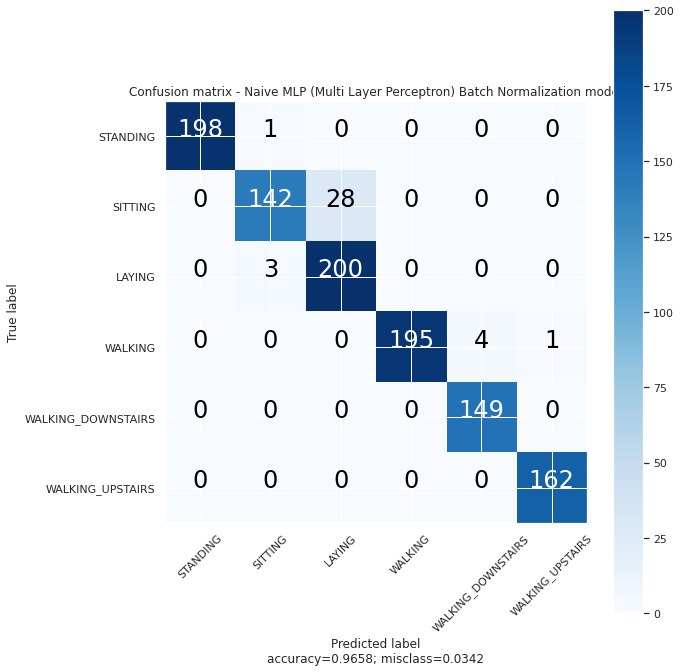

In [57]:
plot_confusion_matrix(mul_c,
                          ['STANDING','SITTING','LAYING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'],
                          'Confusion matrix - Naive MLP (Multi Layer Perceptron) Batch Normalization model',
                           'Blues',
                          False)

### We continue to see better results of classification on the motion activities (walking, walking downstairs, walking upstairs) compared to non-motion (standing, sitting, laying) activities. Another good thing is that we have 4 classes out of 6 having some degree of misprediction. It has dropped from earlier model which was having 6 classes out of 6 mispredicted to some extent.

### 3. Dropout

To ensure redundancy in the network and that the model does not overfit on some particular feature only, we introduce a random dropout of 20% on the neurons for more stable results

In [58]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (x_train.shape[1], ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(y_train.shape[1], kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

### Fit the MLP model on the train dataframe increasing the number of epochs so that the model converges on the weights

In [59]:
model = mlp_model()
history = model.fit(x_train_scaled, y_train, epochs = 100, verbose = 1)

Epoch 1/100
79/79 [==============================] - 0s 2ms/step - loss: 1.5044 - accuracy: 0.4074
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.8504 - accuracy: 0.6853
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.7736
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.8369
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8670
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8848
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8903
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2584 - accuracy: 0.9137
Epoch 9/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2413 - accuracy: 0.9200
Epoch 10/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2179 - accuracy: 0.9216
Epoch 11/

In [60]:
results = model.evaluate(x_test_scaled, y_test)

34/34 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9760


In [61]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9759926199913025


### The test accuracy has improved to 97.60% from 96.58% in previous model

In [62]:
# make a prediction
ynew = model.predict_classes(x_test_scaled)
# show the inputs and predicted outputs
for i in range(len(x_test_scaled)):
  arr = df.activity.unique()
  pred =  ynew[i]
  print("Actual Y=%s, Predicted=%s" % (test.iloc[i, test.columns.get_loc('activity')], arr[pred]))

Actual Y=SITTING, Predicted=SITTING
Actual Y=WALKING, Predicted=WALKING
Actual Y=STANDING, Predicted=LAYING
Actual Y=WALKING, Predicted=WALKING
Actual Y=WALKING_UPSTAIRS, Predicted=WALKING_UPSTAIRS
Actual Y=WALKING_UPSTAIRS, Predicted=WALKING_UPSTAIRS
Actual Y=SITTING, Predicted=SITTING
Actual Y=LAYING, Predicted=STANDING
Actual Y=STANDING, Predicted=SITTING
Actual Y=SITTING, Predicted=SITTING
Actual Y=WALKING, Predicted=WALKING
Actual Y=LAYING, Predicted=STANDING
Actual Y=LAYING, Predicted=STANDING
Actual Y=STANDING, Predicted=LAYING
Actual Y=STANDING, Predicted=LAYING
Actual Y=STANDING, Predicted=SITTING
Actual Y=WALKING, Predicted=WALKING
Actual Y=LAYING, Predicted=STANDING
Actual Y=LAYING, Predicted=STANDING
Actual Y=STANDING, Predicted=LAYING
Actual Y=WALKING_UPSTAIRS, Predicted=WALKING_UPSTAIRS
Actual Y=WALKING_UPSTAIRS, Predicted=WALKING_UPSTAIRS
Actual Y=WALKING, Predicted=WALKING
Actual Y=WALKING, Predicted=WALKING
Actual Y=WALKING_DOWNSTAIRS, Predicted=WALKING_DOWNSTAIRS
Actu

In [63]:
from sklearn.metrics import confusion_matrix
ynew = model.predict_classes(x_test_scaled)
i, j = np.where(pd.get_dummies(test['activity']).values == 1)
#print(j)
mul_c = confusion_matrix(
    #test['activity'],
    j,
    ynew)
    #labels=['STANDING','SITTING','LAYING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'])
    #labels=[0,1,2,3,4,5])
mul_c

array([[199,   0,   0,   0,   0,   0],
       [  0, 164,   6,   0,   0,   0],
       [  0,  17, 186,   0,   0,   0],
       [  0,   0,   0, 198,   1,   1],
       [  0,   0,   0,   0, 148,   1],
       [  0,   0,   0,   0,   0, 162]])

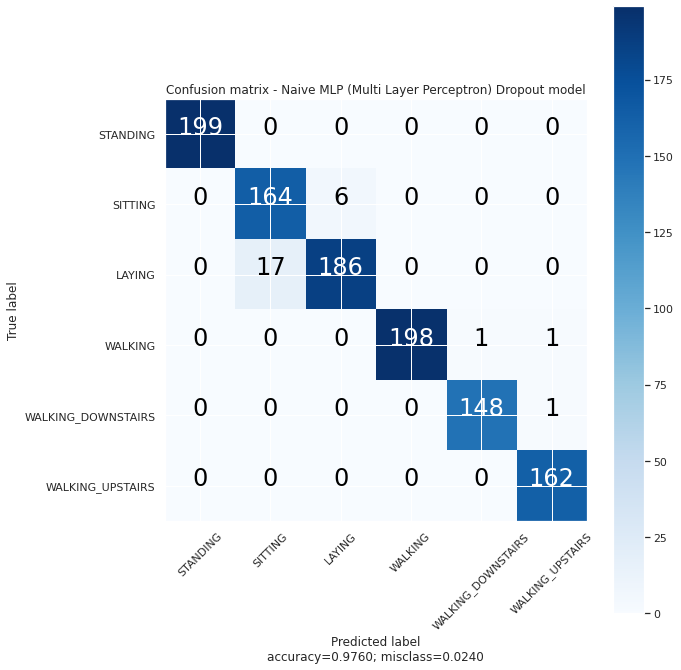

In [64]:
plot_confusion_matrix(mul_c,
                          ['STANDING','SITTING','LAYING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'],
                          'Confusion matrix - Naive MLP (Multi Layer Perceptron) Dropout model',
                           'Blues',
                          False)

### The accuracy has increased a bit, we can see this model mispredicts 4 classes that is in sitting/laying and walking/walking downstairs. All other classes are accurately predicted. In production, this model will be more preferred compared to earlier models which have higher accuracy but do slight misprediction in higher number of classes.

### Attempting the problem as a binary classification with two classes, motion and non motion. We will classify motion as walking, walking_downstairs and walking_upstairs activities and non-motion as standing, sitting and laying activities

In [65]:
df2['activity2'] = df2['activity'].map({'STANDING': 'NON-MOTION', 
                                        'SITTING': 'NON-MOTION', 'LAYING': 'NON-MOTION', 
                                        'WALKING':'MOTION','WALKING_DOWNSTAIRS' : 'MOTION', 
                                        'WALKING_UPSTAIRS' :'MOTION'})


### Split the data into train and test set in 70:30 ratio

In [66]:
train, test = train_test_split(df2, test_size=0.3)

y_train = pd.get_dummies(train['activity2'])
y_test = pd.get_dummies(test['activity2'])
x_train = train.drop(['rn','activity','activity2'],axis=1)
x_test = test.drop(['rn','activity','activity2'],axis=1)

### Scale the independent features in train and test set

In [67]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

### Build the MLP model with dropout functionality

In [68]:
model = mlp_model()
history = model.fit(x_train_scaled, y_train, epochs = 100, verbose = 1)

Epoch 1/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2290 - accuracy: 0.9184
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9937
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9964
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9992
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 0.9976
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9988
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9976
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.9992
Epoch 9/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.9996
Epoch 10/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.9984
Epoch 11/

### Evaluate model accuracy on test set

In [69]:
results = model.evaluate(x_test_scaled, y_test)
print('Test accuracy: ', results[1])

34/34 [==============================] - 0s 1ms/step - loss: 2.1431e-07 - accuracy: 1.0000
Test accuracy:  1.0


### Predict the classes on the test set

In [70]:
ynew = model.predict_classes(x_test_scaled)
# show the inputs and predicted outputs
for i in range(len(x_test_scaled)):
  arr = df2.activity2.unique()
  pred =  1 - ynew[i]
  print("Actual Y=%s, Predicted=%s" % (test.iloc[i, test.columns.get_loc('activity2')], arr[pred]))

Actual Y=NON-MOTION, Predicted=NON-MOTION
Actual Y=NON-MOTION, Predicted=NON-MOTION
Actual Y=NON-MOTION, Predicted=NON-MOTION
Actual Y=MOTION, Predicted=MOTION
Actual Y=NON-MOTION, Predicted=NON-MOTION
Actual Y=MOTION, Predicted=MOTION
Actual Y=NON-MOTION, Predicted=NON-MOTION
Actual Y=NON-MOTION, Predicted=NON-MOTION
Actual Y=NON-MOTION, Predicted=NON-MOTION
Actual Y=NON-MOTION, Predicted=NON-MOTION
Actual Y=MOTION, Predicted=MOTION
Actual Y=NON-MOTION, Predicted=NON-MOTION
Actual Y=NON-MOTION, Predicted=NON-MOTION
Actual Y=MOTION, Predicted=MOTION
Actual Y=MOTION, Predicted=MOTION
Actual Y=MOTION, Predicted=MOTION
Actual Y=MOTION, Predicted=MOTION
Actual Y=NON-MOTION, Predicted=NON-MOTION
Actual Y=NON-MOTION, Predicted=NON-MOTION
Actual Y=MOTION, Predicted=MOTION
Actual Y=NON-MOTION, Predicted=NON-MOTION
Actual Y=NON-MOTION, Predicted=NON-MOTION
Actual Y=MOTION, Predicted=MOTION
Actual Y=MOTION, Predicted=MOTION
Actual Y=NON-MOTION, Predicted=NON-MOTION
Actual Y=MOTION, Predicted=MOT

### Plot the confusion matrix to check accuracy of class prediction

In [71]:
from sklearn.metrics import confusion_matrix
ynew = model.predict_classes(x_test_scaled)
i, j = np.where(pd.get_dummies(test['activity2']).values == 1)
#print(j)
mul_c = confusion_matrix(
    #test['activity'],
    j,
    ynew)
    #labels=['STANDING','SITTING','LAYING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'])
    #labels=[0,1,2,3,4,5])
mul_c

array([[491,   0],
       [  0, 592]])

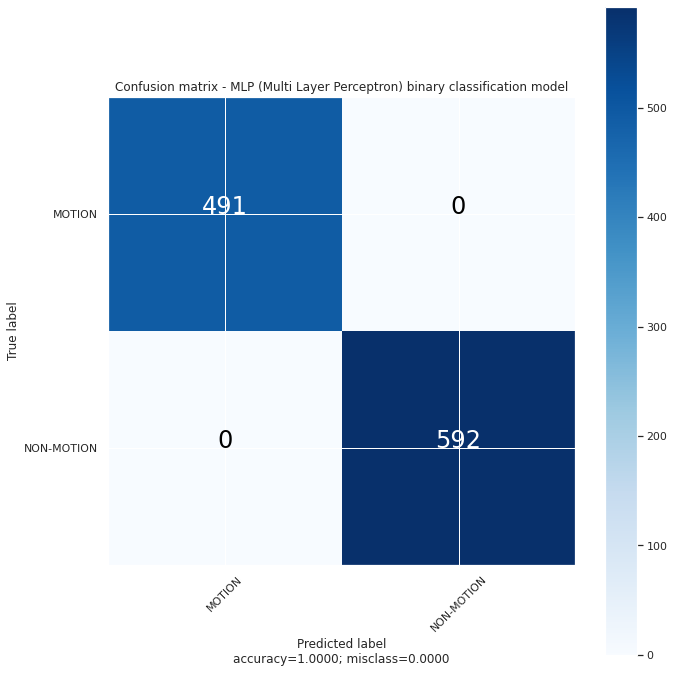

In [72]:
plot_confusion_matrix(mul_c,
                          ['MOTION','NON-MOTION'],
                          'Confusion matrix - MLP (Multi Layer Perceptron) binary classification model',
                           'Blues',
                          False)

### We can see that the misclassification is far lower in binary classification compared to multi class classification. There is no observation that has been mispredicted in the test set and we have perfect accuracy of 100%.

### Let us try support vector machine (SVM) for classification and see if we are able to get better results

In [73]:
from sklearn import svm

### Define accuracy function

In [74]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x]== predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

### Build SVM model. Gamma is a measure of influence of a data point. It is inverse of distance of influence. C is penalty of wrong classifications.

In [75]:
clf = svm.SVC(gamma=0.025, C=3)  

### Make it a binary classification, so it is easier to compare

In [76]:
df2['activity3'] = df2['activity'].map({'STANDING': 0, 
                                        'SITTING': 0, 'LAYING': 0, 
                                        'WALKING':1,'WALKING_DOWNSTAIRS' : 1, 
                                        'WALKING_UPSTAIRS' :1})

### Split into train and test split of 70:30 ratio

In [77]:
train, test = train_test_split(df2, test_size=0.3)

y_train = train['activity3']
y_test = test['activity3']
x_train = train.drop(['rn','activity','activity2','activity3'],axis=1)
x_test = test.drop(['rn','activity','activity2','activity3'],axis=1)

### Scale the independent features of train and test dataframes

In [78]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

### Fit the SVM model on train dataset

In [79]:
clf.fit(x_train_scaled , y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Predict the values on test dataset

In [80]:
y_pred = clf.predict(x_test_scaled)

In [81]:
#y_test.values

In [82]:
#len(y_pred)

### We get accuracy of 88.09% on the test set which is much lower than what we got from neural networks

In [83]:
getAccuracy(y_test.values , y_pred) 

88.08864265927978

### Plot the confusion matrix, we see that most of the error is in predicting the non motion activity compared to motion activity

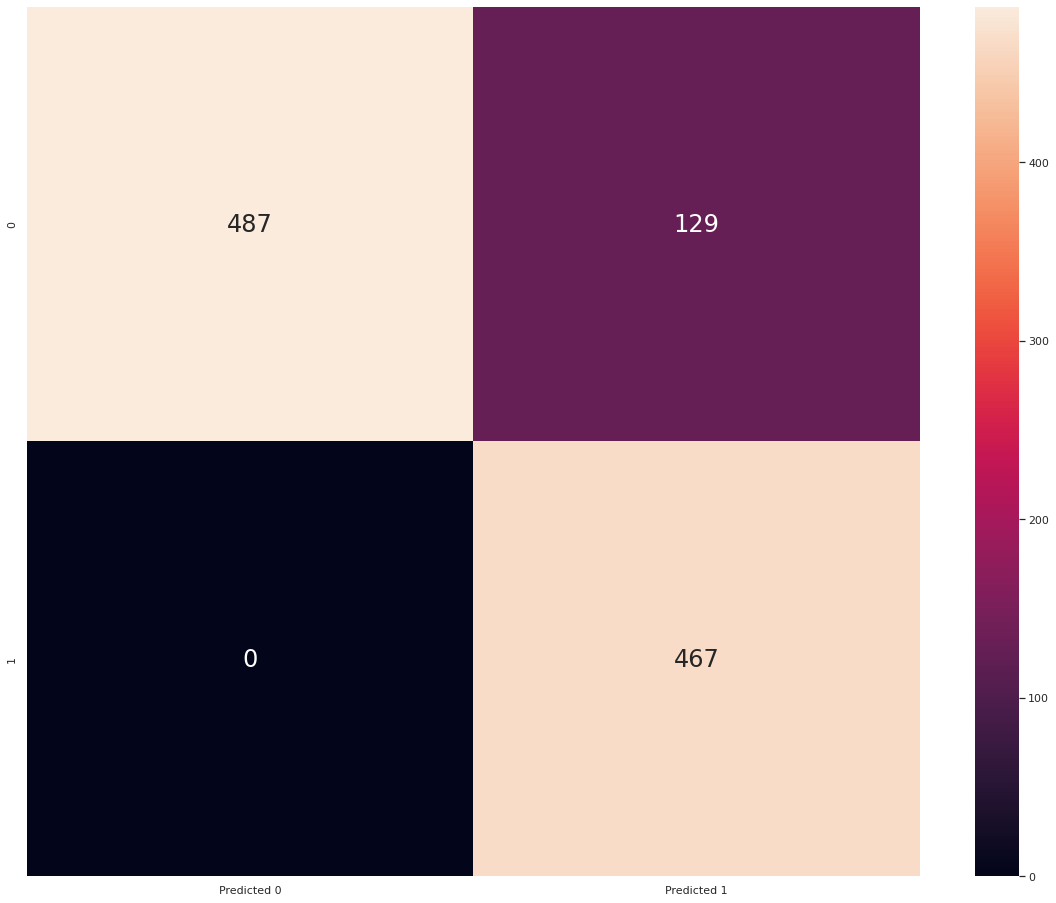

In [84]:
from sklearn import metrics
import seaborn as sns
lab = [0,1]
plab=["Predicted "+ str(s) for s in lab]
cm=metrics.confusion_matrix(y_test, y_pred, labels=lab)

df_cm = pd.DataFrame(cm, index = [i for i in lab],
                  columns = [i for i in plab])
plt.figure(figsize = (20,16))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Why human activity recognition is important?

### There are several application domains where these concepts are investigated and the systems are developed. We divide them roughly into four categories: active and assisted living (AAL) systems for smart homes, healthcare monitoring applications, monitoring and surveillance systems for indoor and outdoor activities, and tele-immersion (TI) applications.

## Would clustering give a better result than neural networks?

### We compared among SVM and neural networks and it seems neural networks give better results for this problem as it is closer to how humans recognize motion. We can seperately check if clustering is giving us better results. Since clustering is non supervised, one of the first checks would be to see if the data is clusterable (conduct Hopkins test) and secondly does it identify six clusters which we know exist in the data. We can use K-means clustering with K=2 and 6 which we know is true as the data is labelled.



### Install pyclustertend package for hopkins test

In [85]:
!pip install pyclustertend

### Conduct the Hopkins test on independent features in the train dataset. We take sample size as 1, and see the value is 0.13 which is very close to zero. This means that the data is clusterable.

In [86]:
from pyclustertend import hopkins
hopkins(x_train_scaled,1)

0.13570162060198238

### Check the appropriate value of k by using elbow method, we see a clear kink at K=2 which shows that two clusters exist (motion and non motion). However the kink at K=6 is not that clear showing it will be harder to identify that many clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

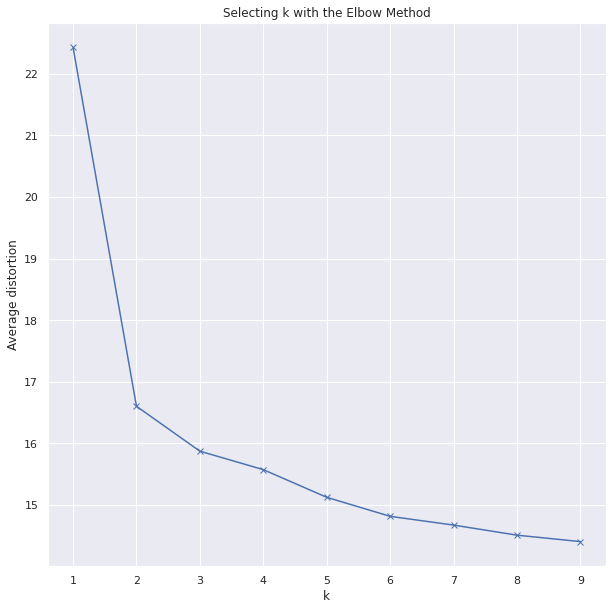

In [87]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
clusters=range(1,10)
meanDistortions=[]
#km = KMeans(n_clusters=number_of_k, init='k-means++', 
#            max_iter=100, n_init=1, verbose=0, random_state=3425)

for k in clusters:
    model=KMeans(n_clusters=k,init='k-means++',random_state=3425)
    model.fit(x_train_scaled)
    prediction=model.predict(x_train_scaled)
    meanDistortions.append(sum(np.min(cdist(x_train_scaled, model.cluster_centers_, 'euclidean'), axis=1)) 
    / x_train_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### Let us check with 2 clusters and find out the accuracy in train and test dataframes

In [88]:
# Let us first start with K = 2
final_model=KMeans(2,init='k-means++',random_state=3425)
final_model.fit(x_train_scaled)
train_prediction=final_model.predict(x_train_scaled)
test_prediction=final_model.predict(x_test_scaled)

In [89]:
getAccuracy(y_train.values , train_prediction) 

99.84164687252573

In [90]:
getAccuracy(y_test.values, test_prediction)

99.81532779316713

### We were able to achieve 99.81% accuracy on the test dataset, this is comparable result to neural networks and we can clearly see that there is minimal misclassification in the confusion matrix

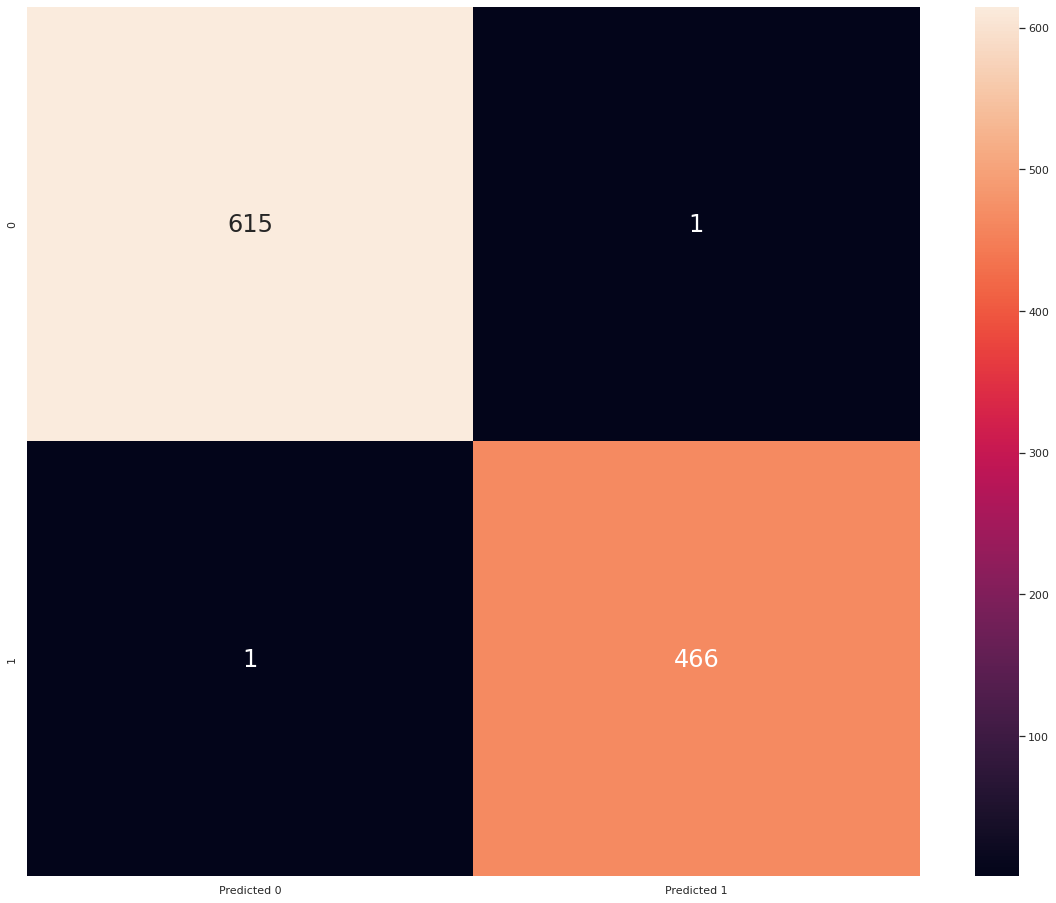

In [91]:
from sklearn import metrics
import seaborn as sns
lab = [0,1]
plab=["Predicted "+ str(s) for s in lab]
cm=metrics.confusion_matrix(y_test, test_prediction, labels=lab)

df_cm = pd.DataFrame(cm, index = [i for i in lab],
                  columns = [i for i in plab])
plt.figure(figsize = (20,16))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Let us check with number of clusters equal to 6, we see that 

In [92]:
df2['activity4'] = df2['activity'].map({'STANDING': 0, 
                                        'SITTING': 1, 'LAYING': 2, 
                                        'WALKING':3,'WALKING_DOWNSTAIRS' : 4, 
                                        'WALKING_UPSTAIRS' :5})

train, test = train_test_split(df2, test_size=0.3)

y_train = train['activity4']
y_test = test['activity4']
x_train = train.drop(['rn','activity','activity2','activity3','activity4'],axis=1)
x_test = test.drop(['rn','activity','activity2','activity3','activity4'],axis=1)


x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [93]:
# Let us first start with K = 6
final_model=KMeans(6,init='k-means++',random_state=3425)
final_model.fit(x_train_scaled)
train_prediction=final_model.predict(x_train_scaled)
test_prediction=final_model.predict(x_test_scaled)

In [94]:
#train_prediction

In [95]:
#y_train

In [96]:
getAccuracy(y_train.values , train_prediction) 

0.0395882818685669

In [97]:
getAccuracy(y_test.values, test_prediction)

0.0

### We have got very poor accuracy with K=6 cluster which shows that clustering may not be a good idea for granular classification which is getting very nuanced details of the features. So as per our analysis, it looks like if we need to do binary classification (motion vs non-motion) we should go for clustering instead of neural networks as it is simpler and the results are comparable. However if we need to do multi class classification (sitting, standing, laying, walking, walking_downstairs, walking_upstairs) we should go for neural networks as that gives better accuracy.

In [99]:
%%shell
jupyter nbconvert --to html /content/Human_Activity_Recognition_Project_Saurabh_Bagchi.ipynb

[NbConvertApp] Converting notebook /content/Human_Activity_Recognition_Project_Saurabh_Bagchi.ipynb to html
[NbConvertApp] Writing 1319461 bytes to /content/Human_Activity_Recognition_Project_Saurabh_Bagchi.html
